In [127]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df=pd.read_csv("restaurant.csv", encoding="ISO-8859-1", engine="python", error_bad_lines=False)

In [21]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [25]:
df.tail()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
1247,2464283,8jzCysQjIwWWqJG0DY2D8g,QJsvTbq7pryyBDrNAyoO4g,RESDUcs7fIiihp38-d6_6g,4,6,2,3,Been there twice.\nI like the place :D\nThe me...,2015-10-19 16:09:05
1248,2464286,jLWzMiehUtF235PG0VBykg,X4OIHDiXwjGqsJBGVsH1oQ,RESDUcs7fIiihp38-d6_6g,2,0,2,1,$50 for the lunch (tax and bottomless champagn...,2016-07-27 07:10:53
1249,2464332,zijohyMubSLFQX8SuQB1wQ,yEnhx8laIkg8NiFJlLBh2g,RESDUcs7fIiihp38-d6_6g,5,2,0,0,My boyfriend and I came here yesterday morning...,2015-02-18 15:34:40
1250,2464475,tYExmuHCWjD7Z-5gKlURew,GLa-9-IU5EuLt5W8VWQDAQ,RESDUcs7fIiihp38-d6_6g,5,1,0,2,Oh my Gaaaaaaaawsh this is the best buffet eee...,2015-04-16 15:19:19
1251,2464506,6TigXEzzX3cqjMA2dNQmgw,BlLvVVZ2XknJD2swPSt7RQ,RESDUcs7fIiihp38-d6_6g,3,0,0,0,First time in Vegas and it was first stop in V...,2016-06-25 15:13:47


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   1252 non-null   int64 
 1   review_id    1252 non-null   object
 2   user_id      1252 non-null   object
 3   business_id  1252 non-null   object
 4   stars        1252 non-null   int64 
 5   useful       1252 non-null   int64 
 6   funny        1252 non-null   int64 
 7   cool         1252 non-null   int64 
 8   text         1252 non-null   object
 9   date         1252 non-null   object
dtypes: int64(5), object(5)
memory usage: 97.9+ KB


In [37]:
df.dtypes

Unnamed: 0      int64
review_id      object
user_id        object
business_id    object
stars           int64
useful          int64
funny           int64
cool            int64
text           object
date           object
dtype: object

In [23]:
df.isnull().sum()

Unnamed: 0     0
review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [24]:
df.shape

(1252, 10)

In [ ]:
# Text Processing

In [ ]:
df["text"]=df["text"].str.lower() # kücük harfe cevirdik
df["text"]=df["text"].str.replace('[^\w\s]','') # noktalama isaretlerini kaldirdik
df["text"]=df["text"].str.replace('\d+','') # rakamlari kaldirdik
df["text"]=df["text"].str.replace('\n',' ').replace('\r',' ') # enter ve return'lari kaldirdik

In [38]:
# adding sentiment Features
df["sentiment"]=df["stars"].map({5:"positive",4:"positive",3:"neutral",2:"negative",1:"negative"})

In [229]:
df

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,sentiment
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04 03:10:18,positive
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,a feast worthy of gods baccarnal buffet in ca...,2014-01-17 00:50:50,positive
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,the crab legs are better than the ones at wick...,2015-06-08 18:03:09,positive
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19 16:15:29,negative
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,i would give this infinite stars if i could my...,2015-07-28 07:13:17,positive
...,...,...,...,...,...,...,...,...,...,...,...
1247,2464283,8jzCysQjIwWWqJG0DY2D8g,QJsvTbq7pryyBDrNAyoO4g,RESDUcs7fIiihp38-d6_6g,4,6,2,3,been there twice i like the place d the meat a...,2015-10-19 16:09:05,positive
1248,2464286,jLWzMiehUtF235PG0VBykg,X4OIHDiXwjGqsJBGVsH1oQ,RESDUcs7fIiihp38-d6_6g,2,0,2,1,for the lunch tax and bottomless champagne al...,2016-07-27 07:10:53,negative
1249,2464332,zijohyMubSLFQX8SuQB1wQ,yEnhx8laIkg8NiFJlLBh2g,RESDUcs7fIiihp38-d6_6g,5,2,0,0,my boyfriend and i came here yesterday morning...,2015-02-18 15:34:40,positive
1250,2464475,tYExmuHCWjD7Z-5gKlURew,GLa-9-IU5EuLt5W8VWQDAQ,RESDUcs7fIiihp38-d6_6g,5,1,0,2,oh my gaaaaaaaawsh this is the best buffet eee...,2015-04-16 15:19:19,positive


In [52]:
#en iyi ve en kötü
dfsent=df[(df.stars==5) | (df.stars==1)]

In [53]:
dfsent

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,sentiment
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04 03:10:18,positive
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19 16:15:29,negative
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,i would give this infinite stars if i could my...,2015-07-28 07:13:17,positive
5,2370586,gmZJrnsIpYIrhPBsaAVjIw,mCHQQxluggGNYOKqpiR94g,RESDUcs7fIiihp38-d6_6g,5,0,0,0,really enjoyed everything they had to offer it...,2015-04-01 16:18:34,positive
8,2371005,9n4EEhhLlaLDX3QQFVoHMw,or1TN9s4LSRfBF6kmzmb5g,RESDUcs7fIiihp38-d6_6g,5,0,0,0,lots of choices good service line wasnt as lon...,2017-03-27 00:42:19,positive
...,...,...,...,...,...,...,...,...,...,...,...
1244,2464128,KM7WDAyvL3-YjFVghpvP5Q,C1K9VHWJuBInQTNBEfWqhw,RESDUcs7fIiihp38-d6_6g,5,2,1,2,an absolutely epic buffet the meat station alo...,2012-10-12 14:24:45,positive
1245,2464167,RVllL0ijB3HlIq0O3gdGFg,I8ff0wtEKlgU4MSEkJDeLw,RESDUcs7fIiihp38-d6_6g,5,0,0,0,this is one of the biggest buffets i have ever...,2018-09-16 07:15:17,positive
1246,2464192,j9p1bNwj6FjrAqJb3CD-qw,q3PvLnEpFZMYzaS7Pf67Iw,RESDUcs7fIiihp38-d6_6g,1,0,1,0,thanksgiving holiday brunch review nothing sp...,2016-11-24 22:13:27,negative
1249,2464332,zijohyMubSLFQX8SuQB1wQ,yEnhx8laIkg8NiFJlLBh2g,RESDUcs7fIiihp38-d6_6g,5,2,0,0,my boyfriend and i came here yesterday morning...,2015-02-18 15:34:40,positive


In [54]:
dfsent.reset_index(drop=True,inplace=True)  # artik 1 den baslayip sona gidiyor

In [55]:
dfsent

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,sentiment
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04 03:10:18,positive
1,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19 16:15:29,negative
2,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,i would give this infinite stars if i could my...,2015-07-28 07:13:17,positive
3,2370586,gmZJrnsIpYIrhPBsaAVjIw,mCHQQxluggGNYOKqpiR94g,RESDUcs7fIiihp38-d6_6g,5,0,0,0,really enjoyed everything they had to offer it...,2015-04-01 16:18:34,positive
4,2371005,9n4EEhhLlaLDX3QQFVoHMw,or1TN9s4LSRfBF6kmzmb5g,RESDUcs7fIiihp38-d6_6g,5,0,0,0,lots of choices good service line wasnt as lon...,2017-03-27 00:42:19,positive
...,...,...,...,...,...,...,...,...,...,...,...
648,2464128,KM7WDAyvL3-YjFVghpvP5Q,C1K9VHWJuBInQTNBEfWqhw,RESDUcs7fIiihp38-d6_6g,5,2,1,2,an absolutely epic buffet the meat station alo...,2012-10-12 14:24:45,positive
649,2464167,RVllL0ijB3HlIq0O3gdGFg,I8ff0wtEKlgU4MSEkJDeLw,RESDUcs7fIiihp38-d6_6g,5,0,0,0,this is one of the biggest buffets i have ever...,2018-09-16 07:15:17,positive
650,2464192,j9p1bNwj6FjrAqJb3CD-qw,q3PvLnEpFZMYzaS7Pf67Iw,RESDUcs7fIiihp38-d6_6g,1,0,1,0,thanksgiving holiday brunch review nothing sp...,2016-11-24 22:13:27,negative
651,2464332,zijohyMubSLFQX8SuQB1wQ,yEnhx8laIkg8NiFJlLBh2g,RESDUcs7fIiihp38-d6_6g,5,2,0,0,my boyfriend and i came here yesterday morning...,2015-02-18 15:34:40,positive


In [56]:
# model eyit, yeni yazan kisi 1 mi veya 5 mi yildiz vercek anliyoruz

In [164]:
#import classification libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import MultinomialNB # cevabi evet/hayir degil, 1 ve 5 olacagi icin multinomial 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

mb=MultinomialNB()
d=DecisionTreeClassifier()
r=RandomForestClassifier()
gb=GradientBoostingClassifier()
k=KNeighborsClassifier()

In [165]:
x=dfsent.text
y=dfsent.stars

In [166]:
print(x)

0      after getting food poisoning at the palms hote...
1      not worth it too salty food and expensive this...
2      i would give this infinite stars if i could my...
3      really enjoyed everything they had to offer it...
4      lots of choices good service line wasnt as lon...
                             ...                        
648    an absolutely epic buffet the meat station alo...
649    this is one of the biggest buffets i have ever...
650    thanksgiving holiday brunch review  nothing sp...
651    my boyfriend and i came here yesterday morning...
652    oh my gaaaaaaaawsh this is the best buffet eee...
Name: text, Length: 653, dtype: object


In [167]:
vect=CountVectorizer(lowercase=True,stop_words="english",ngram_range=(1,2)) # ngram kelimeleri birer birer ve ikiser ikiser alalim 
x_yeni=vect.fit_transform(x)

In [ ]:
x_yeni[0]

In [168]:
x_train,x_test,y_train,y_test=train_test_split(x_yeni,y,random_state=42)

In [169]:
x[0]

'after getting food poisoning at the palms hotel i was scared to eat at any more buffets but we figured with the high price tag the positive reviews etc it was worth a chance im really glad we gave it a try btw i uploaded a collage of the things we ate  the seafood line is by the far the longest i would not recommend showing up in heels if youre female my feet were killing me between the line at the door the line to get sat and the seafood line totally worth it though  the prime rib was the best ive ever had  i loved the sweet potato tots  i even have pho  the music was great and so was our server alma  he was a older gentleman with a mustache and was very attentive and delightful  i will return next trip in more comfortable shoes after a horrible visit at the palms with non stop issues in a matter of  hours your establishment was truly the high light of our trip thank you for an exquisite dinner'

In [170]:
# Classification yapiyoruz, 1 mi verecek 5 mi verecek,
# kullanilan kelimeleri egitecez

In [171]:
mb.fit(x_train,y_train)
d.fit(x_train,y_train)
r.fit(x_train,y_train)
gb.fit(x_train,y_train)
k.fit(x_train,y_train)

KNeighborsClassifier()

In [172]:
tahmin=mb.predict(x_test)
tahmin2=d.predict(x_test)
tahmin3=r.predict(x_test)
tahmin4=gb.predict(x_test)
tahmin5=k.predict(x_test)

In [173]:
#MultinomialNB()
accuracy_score(y_test,tahmin) 
#ngram(1,1) acc=0,93, (1,2) acc=0,94 (1,3) acc=0,89, without stopwords dropped to acc=0,87

0.9390243902439024

In [174]:
#DecisionTreeClassifier()
accuracy_score(tahmin2,y_test) 
#ngram(1,1) acc=0,87, (1,2) acc=0,86

0.8719512195121951

In [175]:
#RandomForestClassifier()
accuracy_score(tahmin3,y_test)

0.8048780487804879

In [176]:
#GradientBoostingClassifier()
accuracy_score(tahmin4,y_test)

0.8658536585365854

In [177]:
#KNeighborsClassifier()
accuracy_score(tahmin5,y_test)

0.8109756097560976

In [ ]:
# kisacasi:
# fit transformla vektora cevirdik yaziyi
# sonra onu train test split yaptik
# classification algo cagirdik - 1 mi verdi veya 5 mi verdi
# accuray score yaptik

## kimi zaman n gram yapinca daha iyi kimi zaman yapmayinca ve 1,2 dene 1,3 vb...
# bazen stop_words var daha iyi bazen yok daha iyi

In [ ]:
#Word Cloud

In [130]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image

In [135]:
# WorldCloud olusturan Funktion
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open("cloud.png"))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask) #gönderecegimiz color, ve stopwords sil
    wc.generate(' '.join(data)) #datanin icindeki satirlari birlestiriyor ve wc generieren ediyor
    plt.imshow(wc) #resim göster
    plt.axis("off") #x ve y'yi göstermemis oluyoruz

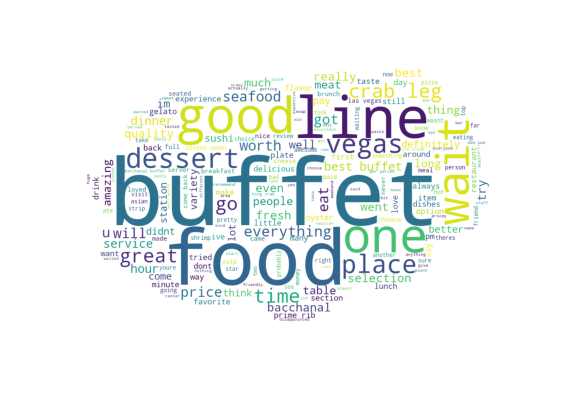

In [136]:
wc(dfsent["text"],'white')

In [140]:
positive=df[df["sentiment"]=="positive"]["text"]
neutral=df[df["sentiment"]=="neutral"]["text"]
negative=df[df["sentiment"]=="negative"]["text"]

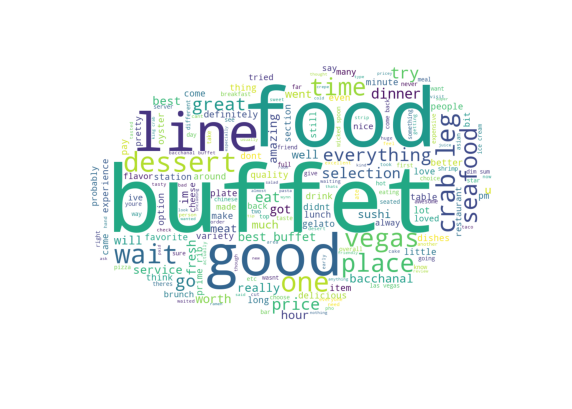

In [141]:
wc(positive,'white')

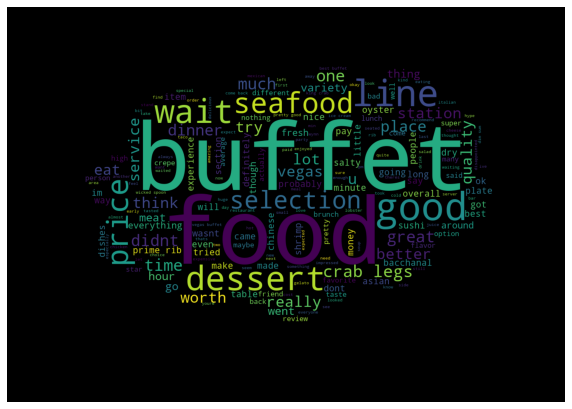

In [145]:
wc(neutral,'black')

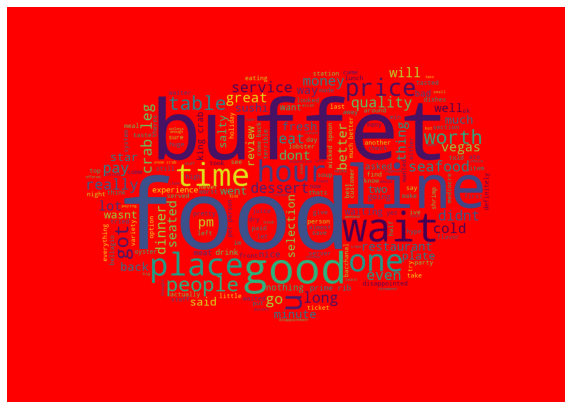

In [143]:
wc(negative,'red')

### Sentiment Analysis

In [231]:
from textblob import TextBlob

In [178]:
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [179]:
df2=df[["text"]]

In [180]:
df2.head()

,text
0,after getting food poisoning at the palms hote...
1,a feast worthy of gods baccarnal buffet in ca...
2,the crab legs are better than the ones at wick...
3,not worth it too salty food and expensive this...
4,i would give this infinite stars if i could my...


In [ ]:
df2["sentiment"]=df2["text"].apply(detect_sentiment)

In [182]:
df2.head()

,text,sentiment
0,after getting food poisoning at the palms hote...,0.367452
1,a feast worthy of gods baccarnal buffet in ca...,0.219409
2,the crab legs are better than the ones at wick...,-0.134722
3,not worth it too salty food and expensive this...,-0.325000
4,i would give this infinite stars if i could my...,0.362500


In [183]:
df2.sentiment.value_counts()

 0.000000    13
 0.250000     8
 0.500000     8
 0.300000     7
 0.275000     5
             ..
 0.308333     1
-0.087500     1
 0.075000     1
 0.333976     1
 0.091818     1
Name: sentiment, Length: 1127, dtype: int64

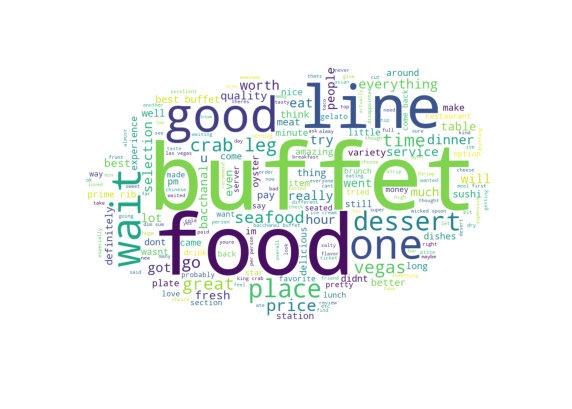

In [184]:
wc(df2.text,'white')

In [185]:
# 1 positive
# 2 negative
# 0 neutral
def sentiment2(sent):
    if sent<-0.02: #0.02:limitin tanimi bu
        return 2
    elif sent>0.02:
        return 1
    else:
        return 0
    #returnlara yazi da yazabiliriz mesela "pozitif" vb.
    
#0 ve 0'in epsilon komsulugunda olan tam 0 degil ama 0 yakin ise, 0 kabul ediyoruz

In [ ]:
df2["sent"]=df2["sentiment"].apply(sentiment2)

In [187]:
df2.head()

,text,sentiment,sent
0,after getting food poisoning at the palms hote...,0.367452,1
1,a feast worthy of gods baccarnal buffet in ca...,0.219409,1
2,the crab legs are better than the ones at wick...,-0.134722,2
3,not worth it too salty food and expensive this...,-0.325000,2
4,i would give this infinite stars if i could my...,0.362500,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


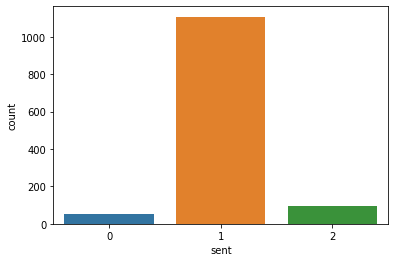

In [188]:
sns.countplot(df2.sent);

In [234]:
df2.sent.value_counts()

1    1107
2      94
0      51
Name: sent, dtype: int64

In [ ]:
#1107 positive, 94 negative, 51 neutral comments

In [203]:
x=df2.text
y=df2.sent

In [204]:
vect=CountVectorizer(stop_words="english")

In [205]:
x=vect.fit_transform(x)

In [206]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.15)

In [207]:
tahmin=mb.fit(x_train,y_train).predict(x_test)
tahmin2=d.fit(x_train,y_train).predict(x_test)
tahmin3=r.fit(x_train,y_train).predict(x_test)
tahmin4=gb.fit(x_train,y_train).predict(x_test)
tahmin5=k.fit(x_train,y_train).predict(x_test)

In [208]:
accuracy_score(tahmin,y_test) #MB

0.8829787234042553

In [209]:
accuracy_score(tahmin2,y_test) #DecTree

0.851063829787234

In [210]:
accuracy_score(tahmin3,y_test) #RandFor

0.8776595744680851

In [211]:
accuracy_score(tahmin4,y_test) #GB

0.8829787234042553

In [212]:
accuracy_score(tahmin5,y_test) #KNN

0.8617021276595744

In [215]:
positive=df2[df2["sent"]==1]["text"]
neutral=df2[df2["sent"]==0]["text"]
negative=df2[df2["sent"]==2]["text"]

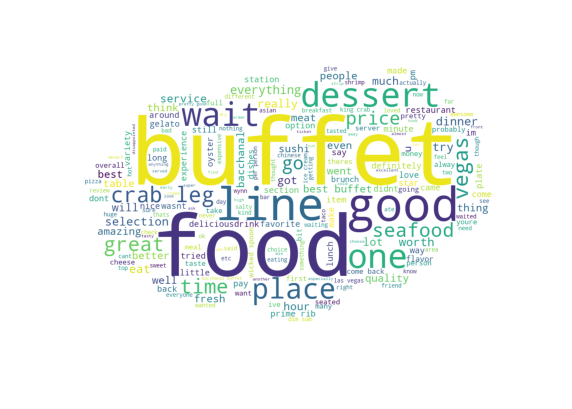

In [216]:
wc(positive,'white')

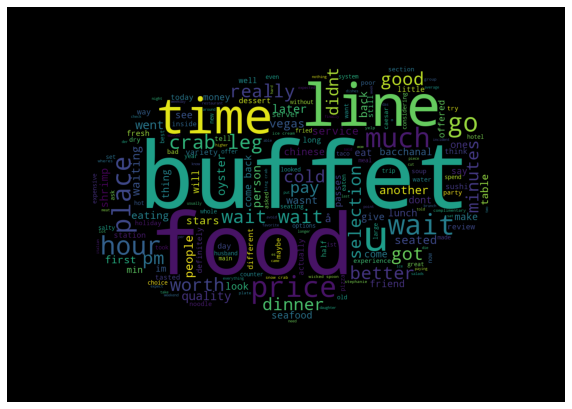

In [217]:
wc(neutral,'black')

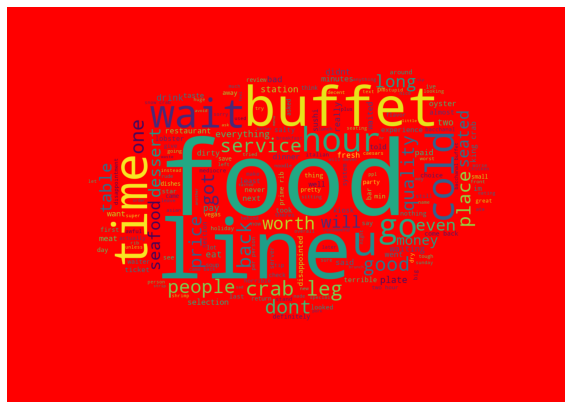

In [218]:
wc(negative,'red')